# Use the built-in benchmark functions

In this example, we will use the built-in benchmark functions provided by the `f3dasm.datageneration` submodule to generate output for a data-driven experiment.

The `f3dasm` framework includes a collection of benchmark functions designed for testing the performance of optimization algorithms or simulating expensive computations to evaluate the data-driven process. These functions are adapted from the [Python Benchmark Test Optimization Function Single Objective GitHub repository](https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective).

Let’s start by creating a continuous domain with 2 input variables, each ranging from -1.0 to 1.0

In [1]:
from f3dasm.design import make_nd_continuous_domain

domain = make_nd_continuous_domain([[-1.0, 1.0], [-1.0, 1.0]])

Invalid MIT-MAGIC-COOKIE-1 key

We generate the input data by sampling the domain equally spaced with the grid sampler and create the `ExperimentData` object:

In [2]:
from f3dasm import ExperimentData, create_sampler

experiment_data = ExperimentData(domain=domain)
sampler = create_sampler("grid")

experiment_data = sampler.call(
    data=experiment_data, stepsize_continuous_parameters=0.1
)

experiment_data

jobs input     
             x0   x1
0    open  -1.0 -1.0
1    open  -1.0 -0.9
2    open  -1.0 -0.8
3    open  -1.0 -0.7
4    open  -1.0 -0.6
..    ...   ...  ...
395  open   0.9  0.5
396  open   0.9  0.6
397  open   0.9  0.7
398  open   0.9  0.8
399  open   0.9  0.9

[400 rows x 3 columns]

Evaluating a 2D version of the 'Ackley' function can be done in two ways:

## Method 1: Providing a function name as a string to the `create_datagenerator` function

simply importing the `create_datagenerator` function and providing the function name as a string.
This will return a `DataGenerator` object that can be armed and called:

In [3]:
from f3dasm import create_datagenerator

# Initialize the built-in Ackley function data generator
data_generator = create_datagenerator("Ackley")

# Arm the Ackley function with the experiment data
data_generator.arm(experiment_data)

# Generate the Ackley function data by calling the data generator
experiment_data = data_generator.call(data=experiment_data)

experiment_data

jobs input         output
                 x0   x1         y
0    finished  -1.0 -1.0  3.625385
1    finished  -1.0 -0.9  3.712731
2    finished  -1.0 -0.8  4.107175
3    finished  -1.0 -0.7  4.476565
4    finished  -1.0 -0.6  4.658923
..        ...   ...  ...       ...
395  finished   0.9  0.5  4.519325
396  finished   0.9  0.6  4.555183
397  finished   0.9  0.7  4.412588
398  finished   0.9  0.8  4.100991
399  finished   0.9  0.9  3.767178

[400 rows x 4 columns]

## Method 2: Importing the function from the `f3dasm.datageneration.functions` module

Another way is to import the `ackley()` function from the `f3dasm.datageneration.functions` module and calling it. This will return a `DataGenerator` object that can be used to evaluate the function.

In [6]:
from f3dasm.datageneration.functions import ackley

In addition, you can provide the followinging keywords to the function call:
- `scale_bounds`: A 2D list of floats that define the scaling lower and upper boundaries for each dimension. The normal benchmark function box-constraints will be scaled to these boundaries.
- `noise`: A float that defines the standard deviation of the Gaussian noise that is added to the objective value.
- `offset`: A boolean value. If True, the benchmark function will be offset by a constant vector that will be randomly generated\*.
- `seed`: Seed for the random number generator for the noise and offset calculations.

\* As benchmark functions usually have their minimum at the origin, the offset is used to test the robustness of the optimization algorithm.


In [7]:
# Initialize the built-in Ackley function data generator
data_generator = ackley(scale_bounds=[[-1.0, 1.0], [-1.0, 1.0]], offset=False)

# Arm the Ackley function with the experiment data
data_generator.arm(experiment_data)

# Generate the Ackley function data by calling the data generator
experiment_data = data_generator.call(data=experiment_data)

experiment_data

jobs input         output
                 x0   x1         y
0    finished  -1.0 -1.0  3.625385
1    finished  -1.0 -0.9  3.712731
2    finished  -1.0 -0.8  4.107175
3    finished  -1.0 -0.7  4.476565
4    finished  -1.0 -0.6  4.658923
..        ...   ...  ...       ...
395  finished   0.9  0.5  4.519325
396  finished   0.9  0.6  4.555183
397  finished   0.9  0.7  4.412588
398  finished   0.9  0.8  4.100991
399  finished   0.9  0.9  3.767178

[400 rows x 4 columns]

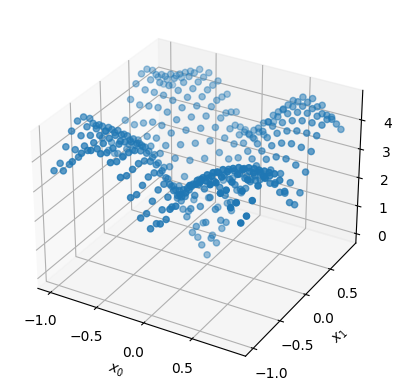

In [8]:
import matplotlib.pyplot as plt

arr_in, arr_out = experiment_data.to_numpy()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(arr_in[:, 0], arr_in[:, 1], arr_out.ravel())
_ = ax.set_xlabel("$x_0$")
_ = ax.set_ylabel("$x_1$")
_ = ax.set_zlabel("$f(x)$")